In [4]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [6]:
movie_data = pd.read_csv('../datasets/IMDB-Movie-Data.csv',
                        sep = ',')

In [7]:
movie_data = movie_data.dropna()

In [8]:
movie_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [9]:
len(movie_data)

838

In [10]:
movie_data['Year'].value_counts()

Year
2016    198
2015    109
2014     93
2013     84
2012     62
2011     57
2010     57
2008     48
2009     45
2007     44
2006     41
Name: count, dtype: int64

In [11]:
movie_data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


In [12]:
#------------------------------------------------------The Binarizer----------------------------------------------------
from sklearn.preprocessing import Binarizer
#Used to apply a threshold to the data
#Anything above is assigned 1
#And below its assigned 0

In [13]:
binarizer = Binarizer(threshold = 7).fit(movie_data[['Rating']])

In [14]:
binarizer 

Binarizer(threshold=7)

In [15]:
binary_x = binarizer.transform(movie_data[['Rating']])
print(binary_x[0:10,:])

[[1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]]


In [16]:
binary_rating_df = pd.DataFrame(data = binary_x,
                                columns = ['Binary Rating'])
binary_rating_df.head()

,Binary Rating
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0


In [17]:
movie_data_updated =pd.concat([movie_data, binary_rating_df],
                              axis = 1)
movie_data_updated[['Title', 'Year', 'Rating', 'Binary Rating']].head(20)

,Title,Year,Rating,Binary Rating
0,Guardians of the Galaxy,2014.0,8.1,1.0
1,Prometheus,2012.0,7.0,0.0
2,Split,2016.0,7.3,1.0
3,Sing,2016.0,7.2,1.0
4,Suicide Squad,2016.0,6.2,0.0
5,The Great Wall,2016.0,6.1,0.0
6,La La Land,2016.0,8.3,1.0
8,The Lost City of Z,2016.0,7.1,0.0
9,Passengers,2016.0,7.0,1.0
10,Fantastic Beasts and Where to Find Them,2016.0,7.5,1.0


In [18]:
movie_data_updated.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Binary Rating
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179,0.424821
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416,0.494611
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000,0.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000,0.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000,0.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000,1.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000,1.000000


In [19]:
#------------------------------------------------------The MinMaxScaler----------------------------------------------------
from sklearn.preprocessing import MinMaxScaler

In [20]:
movie_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


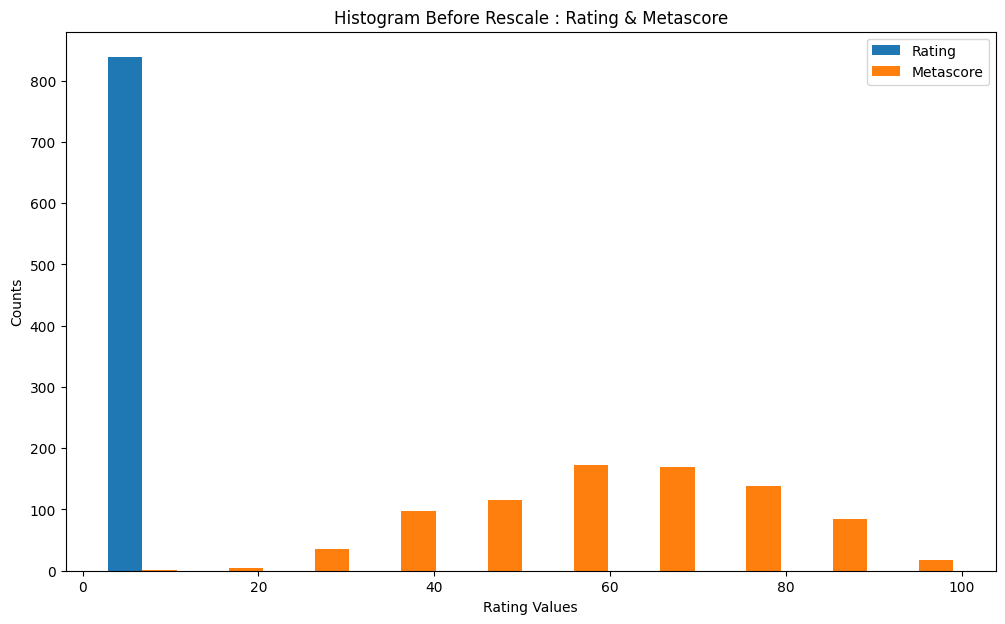

In [24]:
plt.figure(figsize = (12, 7))

plt.hist([movie_data.Rating, movie_data.Metascore],
        bins = 10,
        label = ("Rating", "Metascore"))
plt.title('Histogram Before Rescale : Rating & Metascore')
plt.legend(loc = 'best')

plt.xlabel('Rating Values')
plt.ylabel('Counts')

plt.show()

In [27]:
scaler = MinMaxScaler(feature_range = (0 ,5))
scaler

MinMaxScaler(feature_range=(0, 5))

In [29]:
scaler.get_params

<bound method BaseEstimator.get_params of MinMaxScaler(feature_range=(0, 5))>

In [30]:
scaled_ratings = scaler.fit_transform(movie_data[['Rating', 'Metascore']])

In [32]:
np.set_printoptions(precision = 3)
print(scaled_ratings[0:5,:])

[[4.366 3.652]
 [3.592 3.034]
 [3.803 2.865]
 [3.732 2.697]
 [3.028 1.629]]


In [33]:
ratings_df = pd.DataFrame(data = scaled_ratings,
                          columns = ['ScaledRating', 'ScaledMetascore'])
ratings_df.head()

,ScaledRating,ScaledMetascore
0,4.366197,3.651685
1,3.591549,3.033708
2,3.802817,2.865169
3,3.732394,2.696629
4,3.028169,1.629213


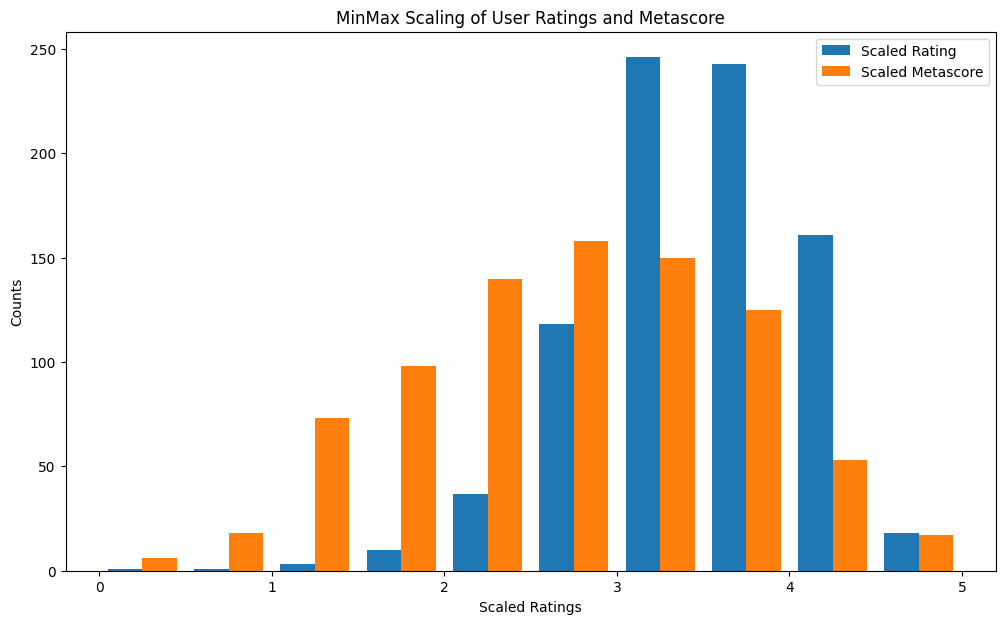

In [34]:
plt.figure(figsize=(12,7))

plt.hist([ratings_df.ScaledRating, ratings_df.ScaledMetascore], bins=10, label=['Scaled Rating', 'Scaled Metascore'])

plt.title('MinMax Scaling of User Ratings and Metascore')

plt.xlabel('Scaled Ratings')
plt.ylabel('Counts')

plt.legend()
plt.show()

In [35]:
#------------------------------------------------------The StandardScaler----------------------------------------------------
from sklearn.preprocessing import StandardScaler

In [50]:
movie_data[['Rating', 'Metascore', 'Revenue (Millions)']].head()

,Rating,Metascore,Revenue (Millions)
0,8.1,76.0,333.13
1,7.0,65.0,126.46
2,7.3,62.0,138.12
3,7.2,59.0,270.32
4,6.2,40.0,325.02


In [51]:
movie_data[['Rating', 'Metascore', 'Revenue (Millions)']].describe()

,Rating,Metascore,Revenue (Millions)
count,838.000000,838.000000,838.000000
mean,6.814320,59.575179,84.564558
std,0.877754,16.952416,104.520227
min,1.900000,11.000000,0.000000
25%,6.300000,47.000000,13.967500
50%,6.900000,60.000000,48.150000
75%,7.500000,72.000000,116.800000
max,9.000000,100.000000,936.630000


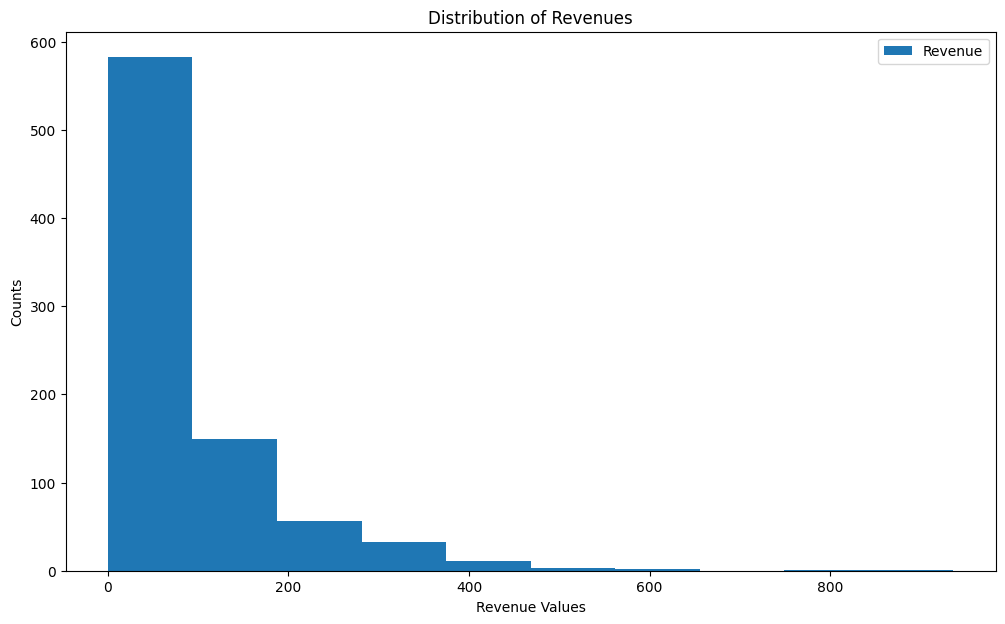

In [38]:
plt.figure(figsize = (12, 7))

plt.hist(movie_data['Revenue (Millions)'],
        bins = 10,
        label = ('Revenue'))
plt.title('Distribution of Revenues')
plt.legend(loc = 'best')

plt.xlabel('Revenue Values')
plt.ylabel('Counts')

plt.show()

In [57]:
scaler = StandardScaler().fit(movie_data[['Rating',
                                          'Metascore',
                                          'Revenue (Millions)'
                                         ]]
                             )
scaler

StandardScaler()

In [63]:
scaler.mean_


array([ 6.814, 59.575, 84.565])

In [62]:
scaler.var_

array([7.695e-01, 2.870e+02, 1.091e+04])

In [64]:
scaled_x = scaler.transform(movie_data[['Rating',
                                        'Metascore',
                                        'Revenue (Millions)'
                                         ]]
                             )

In [65]:
scaled_x

array([[ 1.466,  0.969,  2.38 ],
       [ 0.212,  0.32 ,  0.401],
       [ 0.554,  0.143,  0.513],
       ...,
       [-1.498, -0.801, -0.642],
       [-0.7  , -0.565, -0.254],
       [-1.726, -2.867, -0.622]])

In [73]:
scaled_df = pd.DataFrame(data = scaled_x,
                          columns = ['ScaledRating',
                                     'ScaledMetascore',
                                     'ScaledRevenue'])
scaled_df.head()

,ScaledRating,ScaledMetascore,ScaledRevenue
0,1.465614,0.969456,2.379577
1,0.211666,0.320194,0.401075
2,0.553652,0.143122,0.512699
3,0.439657,-0.033949,1.778281
4,-0.700295,-1.155403,2.301938


In [74]:
scaled_df.describe()

,ScaledRating,ScaledMetascore,ScaledRevenue
count,8.380000e+02,8.380000e+02,8.380000e+02
mean,5.765741e-16,8.479030e-17,3.391612e-17
std,1.000597e+00,1.000597e+00,1.000597e+00
min,-5.602088e+00,-2.867095e+00,-8.095568e-01
25%,-5.862999e-01,-7.422357e-01,-6.758426e-01
50%,9.767130e-02,2.507458e-02,-3.486053e-01
75%,7.816425e-01,7.333610e-01,3.085976e-01
max,2.491570e+00,2.386029e+00,8.157027e+00


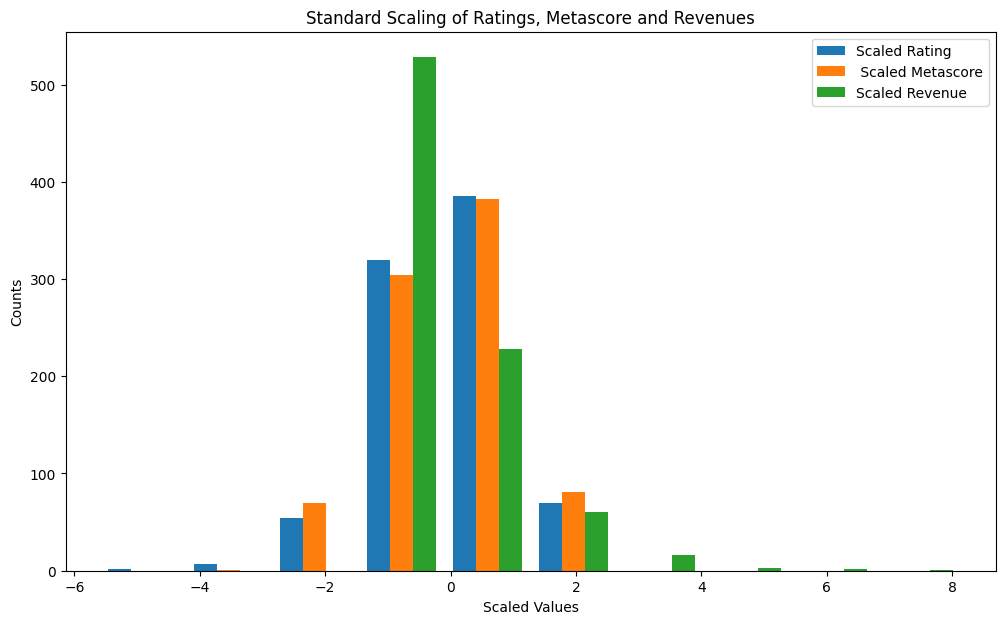

In [75]:
plt.figure(figsize = (12, 7))

plt.hist([scaled_df.ScaledRating,
          scaled_df.ScaledMetascore,
          scaled_df.ScaledRevenue],
        bins = 10,
        label = ('Scaled Rating', ' Scaled Metascore', 'Scaled Revenue'))
plt.title('Standard Scaling of Ratings, Metascore and Revenues')


plt.xlabel('Scaled Values')
plt.ylabel('Counts')

plt.legend()
plt.show()

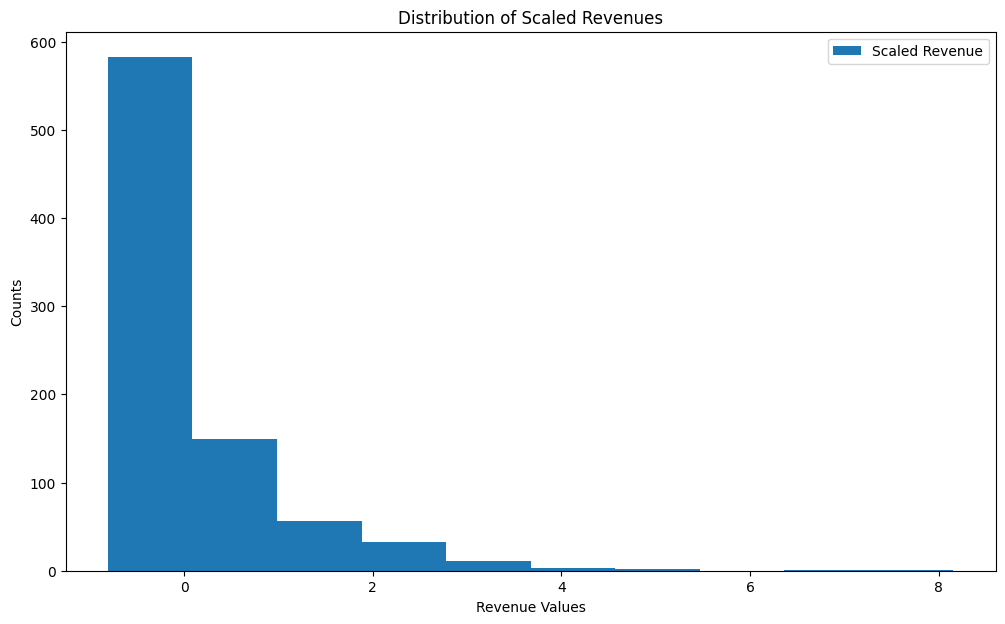

In [76]:
plt.figure(figsize = (12, 7))

plt.hist(scaled_df['ScaledRevenue'],
        bins = 10,
        label = ('Scaled Revenue'))
plt.title('Distribution of Scaled Revenues')
plt.legend(loc = 'best')

plt.xlabel('Revenue Values')
plt.ylabel('Counts')

plt.show()

In [77]:
#------------------------------------------------------The Normalizer----------------------------------------------------
from sklearn.preprocessing import Normalizer

In [78]:
heart_data = pd.read_csv('../datasets/heart_disease_uci.csv', sep = ',')

In [79]:
heart_data.head()
#https://www.kaggle.com/code/ronitf/predicting-heart-disease/notebook

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
#The dataset is no longer available
x = heart_data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
array = x.values
scaler = Normalizer().fit()array()

In [ ]:
scaler.get_params
#Normalizes each of the rows in the array
normalized_array = scaler.transform(array)
print(normalized_array[0:5,:])

In [ ]:
pdf = pd.DataFrame(data = normalized_array)
column_names = ['ages', 'trestbps', 'chol', 'thalach', 'oldpeak']
df.columns = columns_names 
df.head()
df.describe()

In [ ]:
round(df, 2).head()

In [ ]:
#------------------------------------------------------The MaxAbsScaler----------------------------------------------------
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
scaler = MaxAbsScaler().fit(x)

In [ ]:
scaler.max_abs_

In [ ]:
maxabs_x = scaler.transform(x)

In [ ]:
#------------------------------------------------------The Label Encoding----------------------------------------------------


In [ ]:
income_data = pd.read_csv('../datasets/adult.csv', sep=', ')  
income_data.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

income_data['marital-status'] = le.fit_transform(income_data['marital-status'])

In [ ]:
income_data['martial-status'] = le.inverse_transform(income_data['marital-status'])

In [ ]:
#------------------------------------------------------The one-hot Encoding----------------------------------------------------


In [ ]:
ohe_ms = pd.get_dummies(income_data['martial-status'])
ohe_ms.head()

In [ ]:
income_data = pd.get_dummies(data = income_data, columns = ['martial-status'])